# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, 'html.parser')

In [8]:
# Extract all rows of data
table = mars_soup.find('table')
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [13]:
# Create an empty list
data_rows = []
# Loop through the scraped data to create a list of rows
for row in rows:
    columns = row.findAll('td')
    column_data = [col.text for col in columns]
    data_rows.append(column_data)


In [15]:
# #to fix assertion error.
## Explicityly get the headers
# Extract the headers from the table if they exist 

headers = table.findAll('th')
if headers:
    column_names = [header.text for header in headers]
else:
    column_names = data_rows.pop(0)  # Remove the first row as headers

# Now, let's create the DataFrame using the data_rows list
df = pd.DataFrame(data_rows, columns=column_names)

In [16]:
# Confirm DataFrame was created successfully
print(df.head())

     id terrestrial_date   sol    ls month min_temp pressure
0  None             None  None  None  None     None     None
1     2       2012-08-16    10   155     6    -75.0    739.0
2    13       2012-08-17    11   156     6    -76.0    740.0
3    24       2012-08-18    12   156     6    -76.0    741.0
4    35       2012-08-19    13   157     6    -74.0    732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [17]:
# Examine data type of each column
print(df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [18]:
# Change data types for data analysis
# Convert 'terrestrial_date' to datetime format
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'min_temp' to float
df['min_temp'] = df['min_temp'].astype(float)

# Convert 'pressure' to float
df['pressure'] = df['pressure'].astype(float)

In [19]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                         object
ls                          object
month                       object
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [20]:
# 1. How many months are there on Mars?
unique_months = df['month'].nunique()
print(f"Number of unique months in the dataset: {unique_months}")

Number of unique months in the dataset: 12


In [21]:
# 2. How many Martian days' worth of data are there?
total_sols = df['sol'].nunique()
print(f"Total number of Martian days (sols) in the dataset: {total_sols}")

Total number of Martian days (sols) in the dataset: 1867


In [26]:
# 3. What is the average low temperature by month?
avg_min_temp = df.groupby('month')['min_temp'].mean()
print(f"Average low temperature by month: {avg_min_temp}")

Average low temperature by month: month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


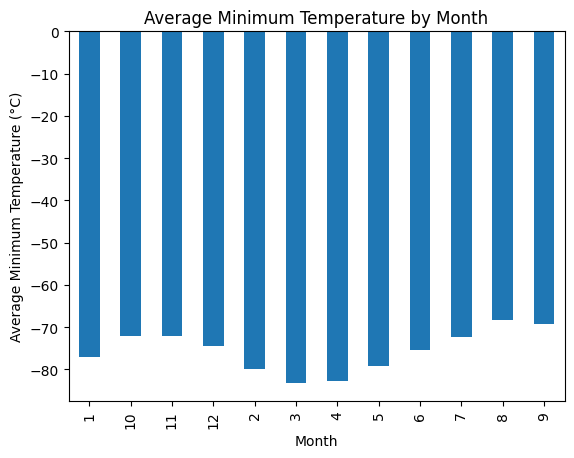

In [27]:
# Plot the average temperature by month
avg_min_temp.plot(kind='bar', title='Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.show()

In [28]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = avg_min_temp.idxmin()
warmest_month = avg_min_temp.idxmax()

print(f"The coldest month is: {coldest_month}")
print(f"The warmest month is: {warmest_month}")

The coldest month is: 3
The warmest month is: 8


In [31]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby('month')['pressure'].mean()
avg_min_temp

month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64

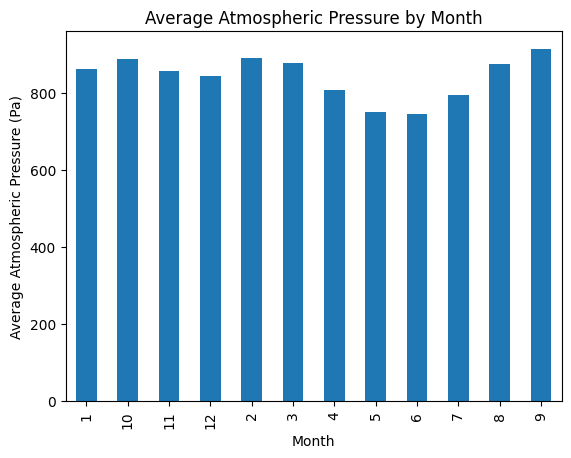

The month with the lowest atmospheric pressure is: 6
The month with the highest atmospheric pressure is: 9


In [34]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', title='Average Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.show()
lowest_pressure_month = avg_pressure.idxmin()
highest_pressure_month = avg_pressure.idxmax()

print(f"The month with the lowest atmospheric pressure is: {lowest_pressure_month}")
print(f"The month with the highest atmospheric pressure is: {highest_pressure_month}")

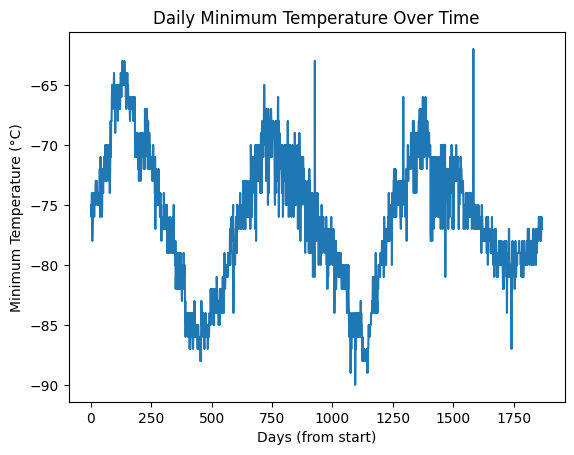

In [35]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df['min_temp'].plot(title='Daily Minimum Temperature Over Time')
plt.xlabel('Days (from start)')
plt.ylabel('Minimum Temperature (°C)')
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [36]:
# Write the data to a CSV
df.to_csv('mars_temperature_data.csv', index=False)


In [37]:
browser.quit()